# Polynomial Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Step 1: create datapoints

In [2]:
def f(x):
    return np.sin(2 * np.pi * x) + 0.3 * np.random.randn()

x_train = np.linspace(0, 1, 10)
y_train = np.array([f(xx) for xx in x_train])

## Step 2: Plot 

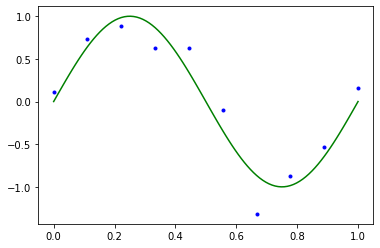

In [3]:
x_test = np.linspace(0, 1, 100)

plt.plot(x_train, y_train, "b.")
plt.plot(x_test, np.sin(2 * np.pi * x_test), "g")
plt.show()

## Step 3: Create test set

In [4]:
y_test = [f(xx) for xx in x_test]

## Step 4: Polynomial curve fitting with degrees 0, 1, ...,9

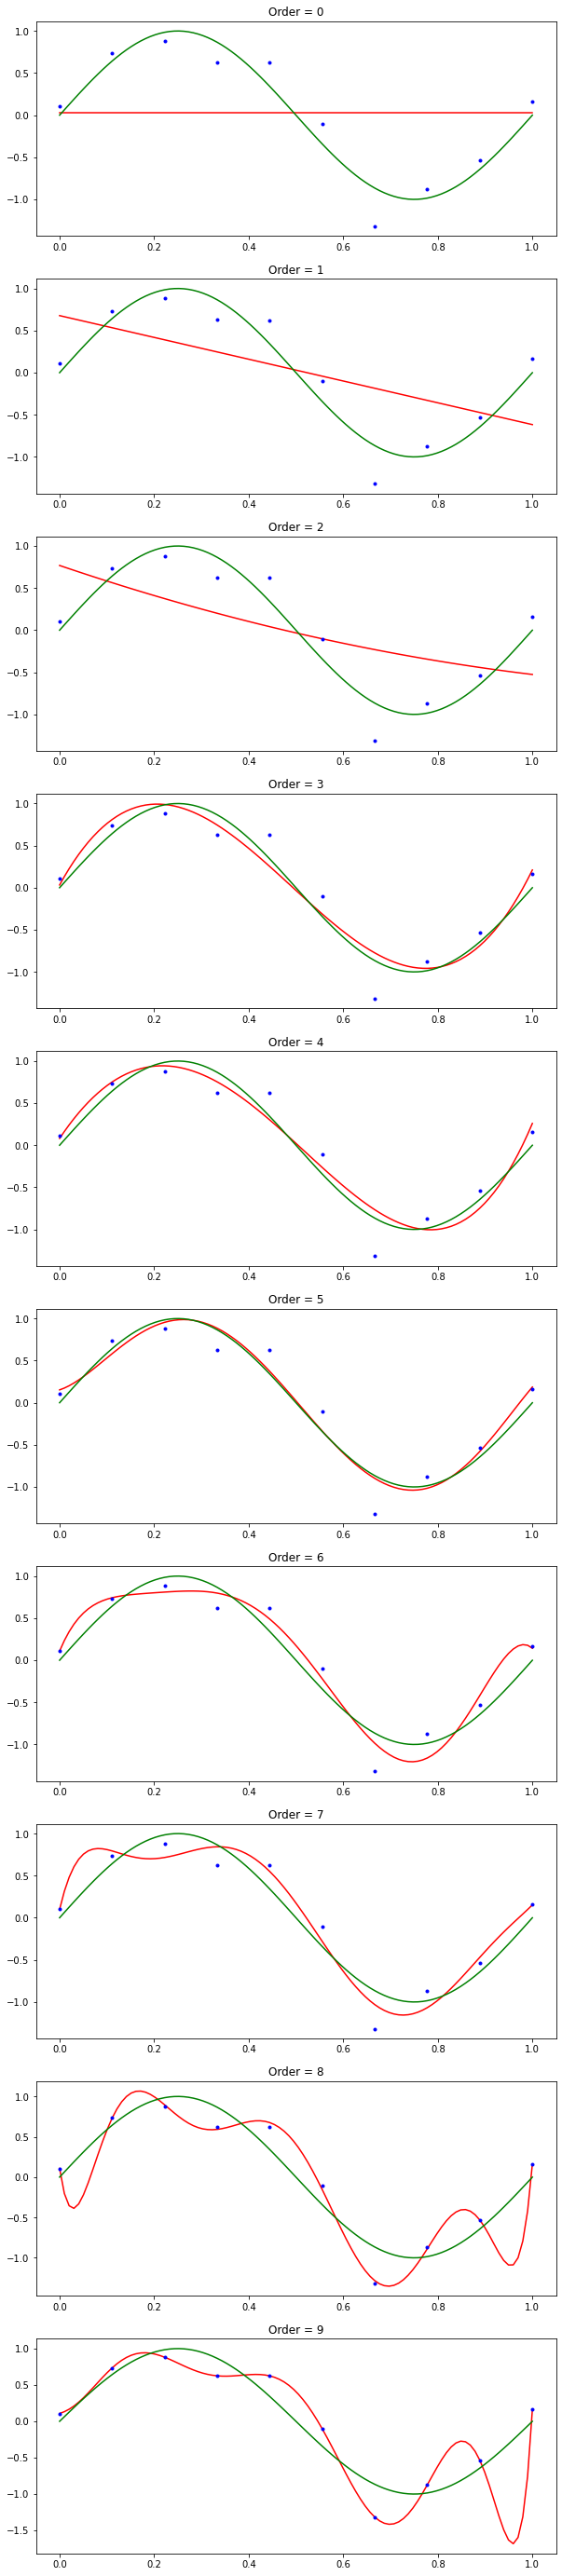

In [6]:
fig, axs = plt.subplots(10, figsize=(10, 50))
rmse_lin_train = []
rmse_lin_test = []

for n in range(10):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=n)), ('linear_regression', LinearRegression())])
    model = model.fit(x_train.reshape(-1,1), y_train)
    
    params = model.named_steps['linear_regression'].coef_
    y_pred_test = model.predict(x_test.reshape(-1,1))
    y_pred_train = model.predict(x_train.reshape(-1,1))
    
    rmse_lin_train.append(sklearn.metrics.mean_squared_error(y_train, y_pred_train, squared=False))
    rmse_lin_test.append(sklearn.metrics.mean_squared_error(y_test, y_pred_test, squared=False))

    axs[n].plot(x_test, y_pred_test, 'r')
    axs[n].plot(x_train, y_train, "b.")
    axs[n].plot(x_test, np.sin(2 * np.pi * x_test), "g")
    axs[n].title.set_text('Order = {}'.format(n))
    
plt.show()


## Step 5: Polynomial fit (N = 9) using ridge regression



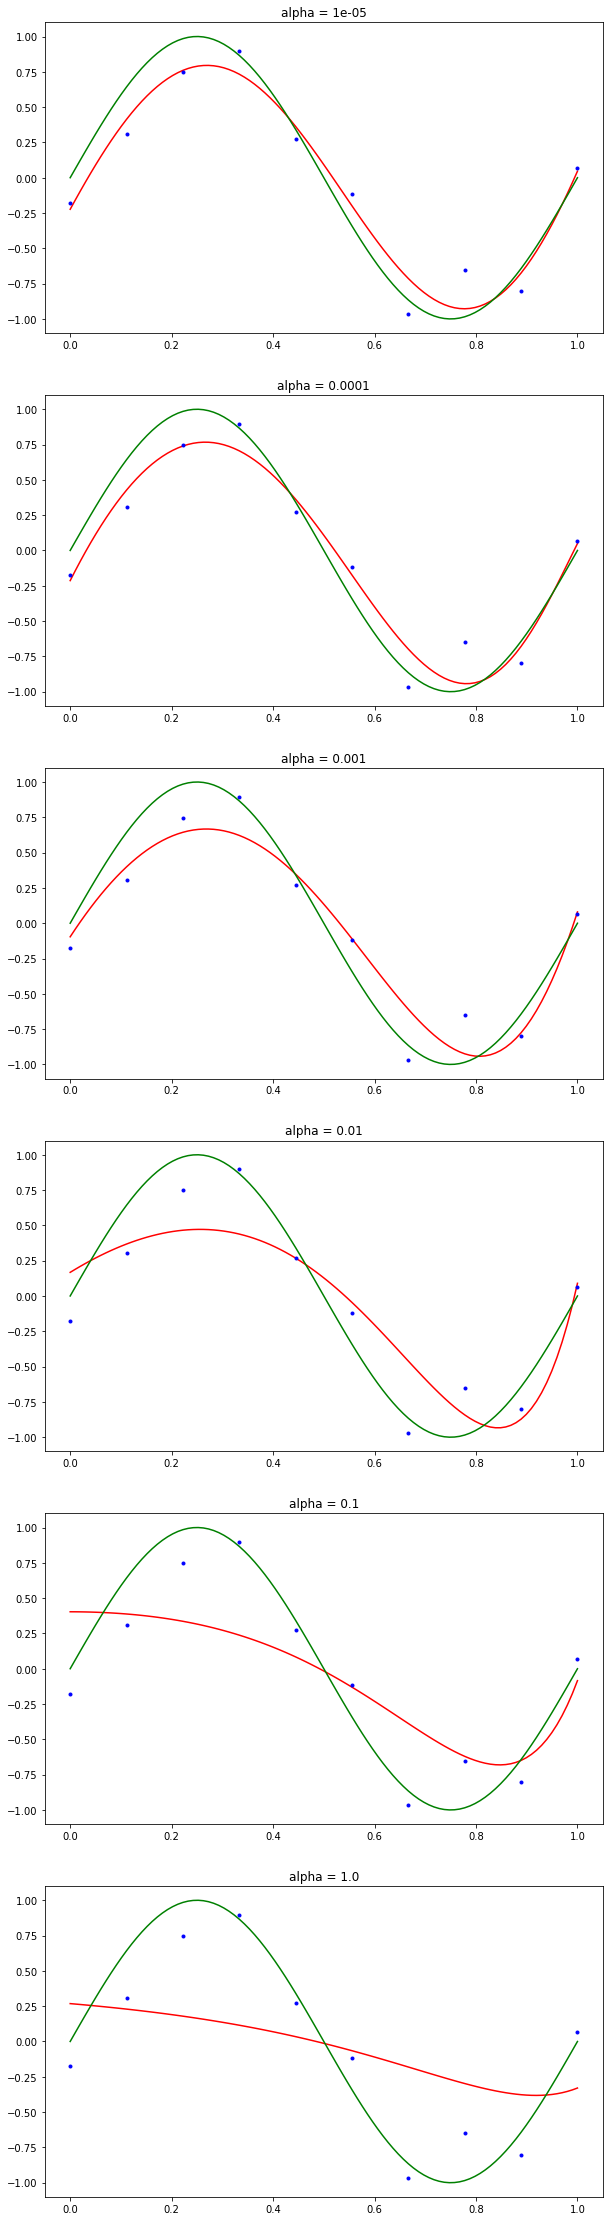

In [ ]:
#ridge
from sklearn.linear_model import Ridge
a = [0.00001, 0.0001, 0.001 ,0.01, 0.1, 1.0]
rmse_ridge_train = []
rmse_ridge_test = []

fig, axs = plt.subplots(len(a), figsize=(10, 40))

for n in range(len(a)):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=9)), ('ridge_regression', Ridge(alpha=a[n]))])
    model = model.fit(x_train.reshape(-1,1), y_train)
    
    y_pred_test = model.predict(x_test.reshape(-1,1))
    y_pred_train = model.predict(x_train.reshape(-1,1))
    rmse_ridge_train.append(sklearn.metrics.mean_squared_error(y_train, y_pred_train, squared=False))
    rmse_ridge_test.append(sklearn.metrics.mean_squared_error(y_test, y_pred_test, squared=False))
    
    
    axs[n].plot(x_test, model.predict(x_test.reshape(-1,1)), 'r')
    axs[n].plot(x_train, y_train, "b.")
    axs[n].plot(x_test, np.sin(2 * np.pi * x_test), "g")
    axs[n].title.set_text('alpha = {}'.format(a[n]))

## Step 6: Root mean square errors

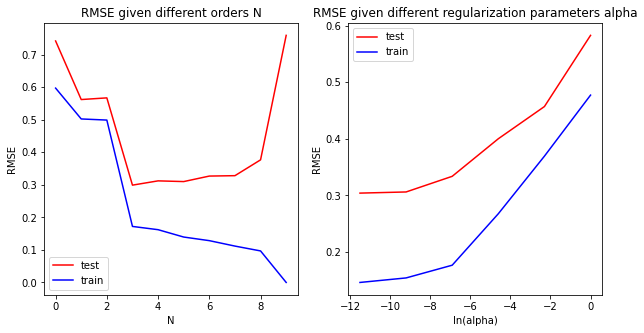

In [ ]:
#plot linear regression:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(range(10), rmse_lin_test, 'r', label='test')
axs[0].plot(range(10), rmse_lin_train, 'b', label='train')
axs[0].title.set_text("RMSE given different orders N")
axs[0].set_xlabel("N")
axs[0].set_ylabel("RMSE")
axs[0].legend()

#plot ridge regression:
#convert alhpa to ln(alpha):
ln_a = [np.log(alpha) for alpha in a]

axs[1].plot(ln_a, rmse_ridge_test, 'r', label='test')
axs[1].plot(ln_a, rmse_ridge_train, 'b', label='train')
axs[1].title.set_text("RMSE given different regularization parameters alpha")
axs[1].set_xlabel("ln(alpha)")
axs[1].set_ylabel("RMSE")
axs[1].legend()

plt.show()

# K Neighbours Regression (KNR)
We repeat steps 4 to 6, but instead of polynomial curve fitting and linear regression, we use K Neighbours Regression with n_neighbors [0,..,10].

## Step 7: Train KNR models for n_neighbours = [0,...,10]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as knr

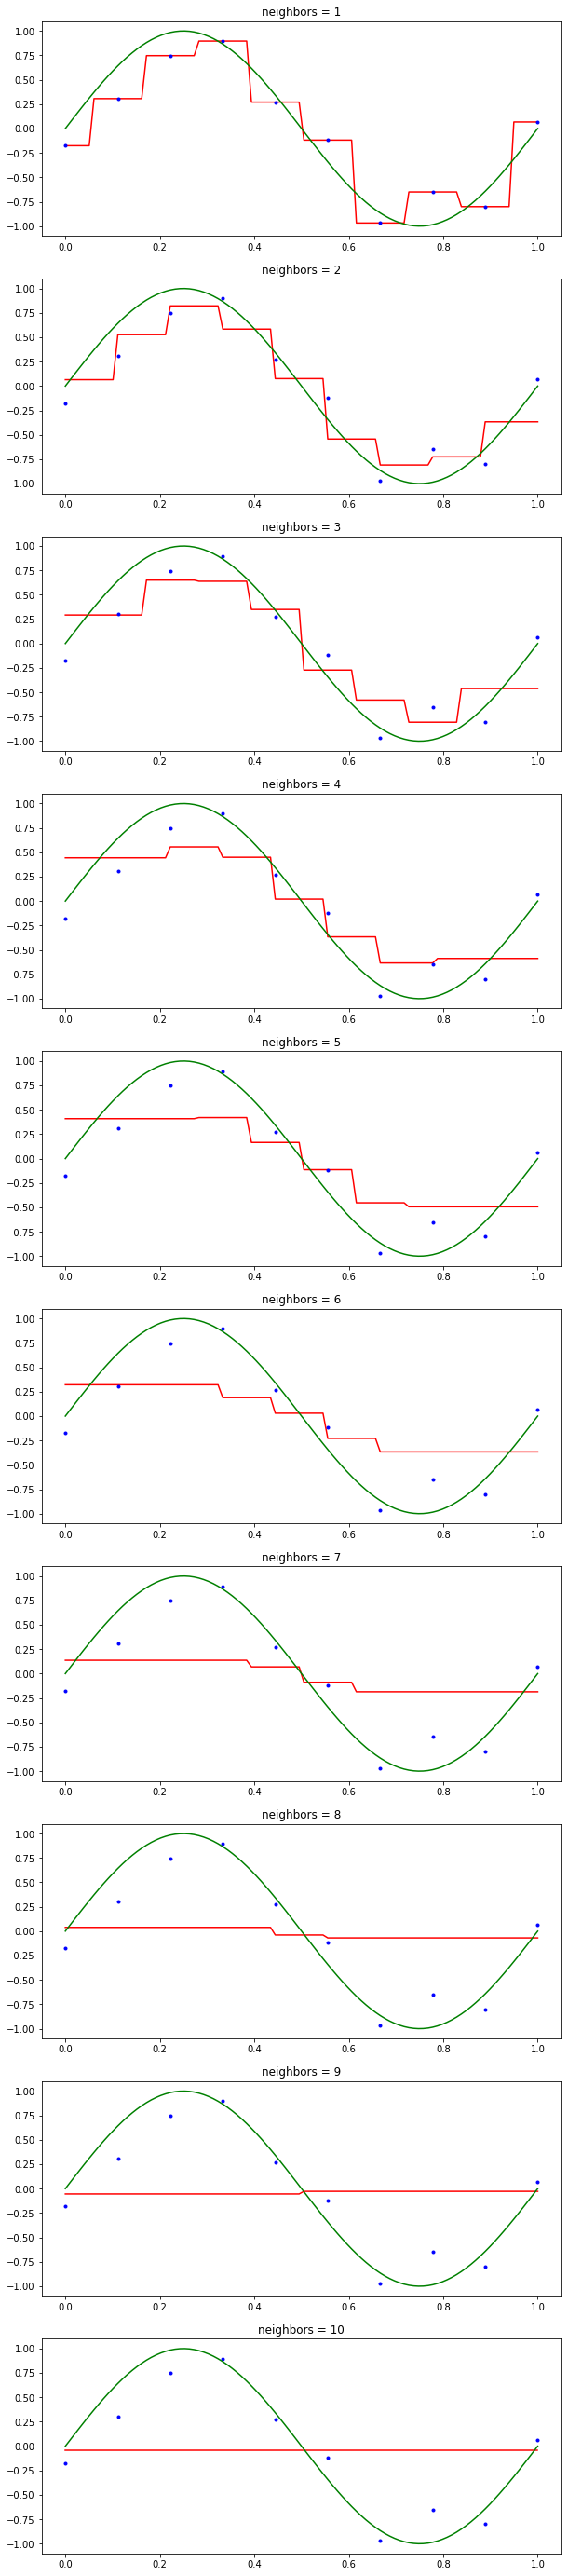

In [ ]:
fig, axs = plt.subplots(10, figsize=(10, 50))
rmse_knr_train = []
rmse_knr_test = []


for n in range(1,11):
    model = knr(n_neighbors=n)
    model = model.fit(x_train.reshape(-1,1), y_train)
    
    y_pred_test = model.predict(x_test.reshape(-1,1))
    y_pred_train = model.predict(x_train.reshape(-1,1))
    
    rmse_knr_train.append(sklearn.metrics.mean_squared_error(y_train, y_pred_train, squared=False))
    rmse_knr_test.append(sklearn.metrics.mean_squared_error(y_test, y_pred_test, squared=False))

    axs[n-1].plot(x_test, y_pred_test, 'r')
    axs[n-1].plot(x_train, y_train, "b.")
    axs[n-1].plot(x_test, np.sin(2 * np.pi * x_test), "g")
    axs[n-1].title.set_text('neighbors = {}'.format(n))
    
plt.show()


## Step 8: Root mean squared errors for KNR

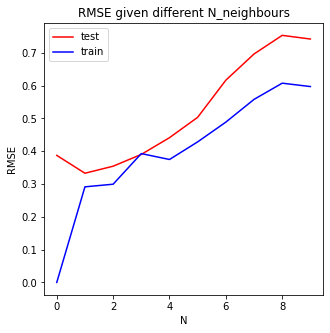

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.plot(range(10), rmse_knr_test, 'r', label='test')
axs.plot(range(10), rmse_knr_train, 'b', label='train')
axs.title.set_text("RMSE given different N_neighbours")
axs.set_xlabel("N")
axs.set_ylabel("RMSE")
axs.legend()
plt.show()

## Combined RMSE plots

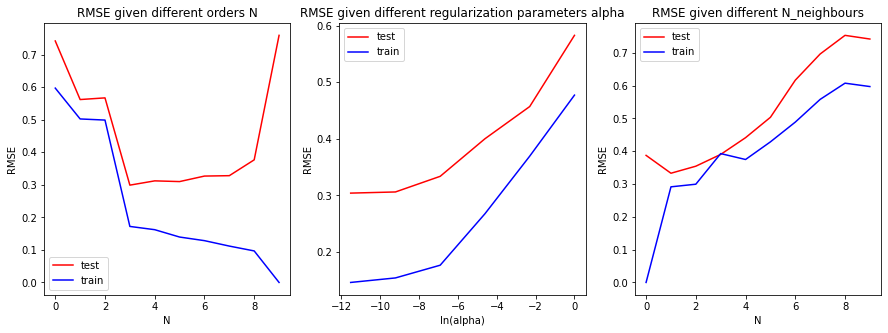

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot linear regression RMSE's:
axs[0].plot(range(10), rmse_lin_test, 'r', label='test')
axs[0].plot(range(10), rmse_lin_train, 'b', label='train')
axs[0].title.set_text("RMSE given different orders N")
axs[0].set_xlabel("N")
axs[0].set_ylabel("RMSE")
axs[0].legend()

# plot ridge regression RMSE's:
axs[1].plot(ln_a, rmse_ridge_test, 'r', label='test')
axs[1].plot(ln_a, rmse_ridge_train, 'b', label='train')
axs[1].title.set_text("RMSE given different regularization parameters alpha")
axs[1].set_xlabel("ln(alpha)")
axs[1].set_ylabel("RMSE")
axs[1].legend()

# plot KNR RMSE's:
axs[2].plot(range(10), rmse_knr_test, 'r', label='test')
axs[2].plot(range(10), rmse_knr_train, 'b', label='train')
axs[2].title.set_text("RMSE given different N_neighbours")
axs[2].set_xlabel("N")
axs[2].set_ylabel("RMSE")
axs[2].legend()

plt.show()